In [3]:
import numpy as np
from matplotlib import pyplot as plt

Série para a função da aula
A função é uma combinação linear de euma função constante e de uma linear

In [5]:
def a0ret(L, d, c):
    return 2*(d**2-c**2)*L/2

In [7]:
def a0cte(L, d, c):
    return 2*((d+1/2) - (c+1/2))*np.pi

In [9]:
def ancte(cin,din,n,L):
    c = cin + 1/2
    d = din + 1/2
    s1 = n * np.pi*d
    s2 = n * np.pi*c
    a1 = 1/(n*np.pi)*np.sin(s1)
    a2 = 1/(n*np.pi)*np.sin(s2)
    return 2*(a1-a2)*np.pi

In [11]:
def anret(c,d,n,L):
    s1 = n * np.pi*d
    s2 = n * np.pi*c
    a1 = (L/(np.pi**2*n**2))*(s1*np.sin(s1) + np.cos(s1))
    a2 = (L/(np.pi**2*n**2))*(s2*np.sin(s2) + np.cos(s2))
    return 2*(a1-a2)

In [13]:
def bncte(cin,din,n,L):
    c = cin + 1/2
    d = din + 1/2
    s1 = n * np.pi*d
    s2 = n * np.pi*c
    a1 = -1/(n*np.pi)*np.cos(s1)
    a2 = -1/(n*np.pi)*np.cos(s2)
    return 2*(a1-a2)*np.pi

In [15]:
def bnret(c,d,n,L):
    s1 = n * np.pi*d
    s2 = n * np.pi*c
    a1 = L/(np.pi**2*n**2)*(-s1*np.cos(s1) + np.sin(s1))
    a2 = L/(np.pi**2*n**2)*(-s2*np.cos(s2) + np.sin(s2))
    return 2*(a1-a2)

In [17]:
def funa(c,d,n,L,t):
    return (anret(c,d,n,L) + ancte(c,d,n,L))*np.cos(n*np.pi*t/L) 

In [19]:
def funb(c,d,n,L,t):
    return (bnret(c,d,n,L) + bncte(c,d,n,L))*np.sin(n*np.pi*t/L)

In [21]:
ns = np.arange(1,10)
c = 0
d = 1/2
L = 2*np.pi
t = 0

In [23]:
def suma(c,d,ns,L,t):
    return np.vectorize(lambda n:funa(c,d,n,L,t))(ns).sum()

In [25]:
def sumb(c,d,ns,L,t):
    return np.vectorize(lambda n:funb(c,d,n,L,t))(ns).sum()

In [27]:
def fun(c,d,n,L,t):
    ns = np.arange(1,n)
    a = a0ret(L,d,c) + a0cte(L,d,c)
    return suma(c,d,ns,L,t) + a/2

In [29]:
def funsen(c,d,n,L,t):
    ns = np.arange(1,n)
    return sumb(c,d,ns,L,t)

In [31]:
fun(c,d,50,L,8)

3.141497540867082

In [33]:
ts = np.arange(0,2*np.pi,0.01)

In [35]:
def actual(c,d,L,t):
    if t < np.pi:
        return t
    else:
        return np.pi

In [38]:
truths = np.vectorize(lambda thist: actual(c,d,L,thist))(ts)

In [40]:
func = np.vectorize(lambda thist: fun(c,d,100,L,thist))(ts)

In [64]:
funs = np.vectorize(lambda thist: funsen(c,d,40,L,thist))(ts)

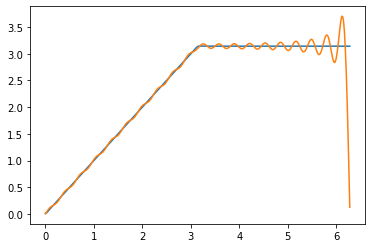

In [68]:
plt.plot(ts,func)
plt.plot(ts,funs)
# plt.plot(ts,truths)